Name of the project:Data Analysis Of Sales Superstore Dataset
Performed y - Manika)
Organization:InnoByte Servicsis

Steps to be performed for analysis:-

1.Data Exploration

2.Data Cleaning

3.Descriptive Statistics

4.Customer Segmentation

5.Product Analysis

6.Time Series Analysis

7.Visualization

8.Conclusion and Recommendations.

Importing Libraries

In [151]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
print("libraries imported successfully")

libraries imported successfully


Reading dataset

In [50]:
df=pd.read_csv(r"C:\Users\admin\Downloads\salessuperstore.csv")
print("data read successfully")

data read successfully


Pre-Processing of data & Exploratory data analysis
Dimensions of the data

In [51]:
df.shape

(9994, 13)

Peek the data

In [52]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [53]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


Columns in the dataset

In [54]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Unique values in category

In [55]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

Unique values in Sub-category

In [56]:
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

Unique values in segments

In [57]:
df["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

Dropping of Postal Code Column

In [58]:
df.drop(columns="Postal Code",inplace=True) 

peek at the data

In [59]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Number of products in each category

In [60]:
df["Category"].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

Total Number of products in all categories

In [61]:
df["Category"].value_counts().sum()

9994

Number of sub-categories products are divided

In [62]:
df["Sub-Category"].nunique()

17

Number of products in each Sub-Category

In [63]:
df["Sub-Category"].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

Types of Region

In [64]:
df["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

Types of shipmodes

In [65]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

unique states

In [66]:
df["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

Unique cities

In [67]:
df["City"].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

Number of unique values in each column

In [68]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Full summary of data

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


Statistical summary of data

In [70]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


Total number of null values in data

In [71]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [72]:
print("total no. of null values",df.isnull().sum().sum())

total no. of null values 0


Data types

In [73]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

Unique data in each columns

In [74]:
for col in df:
    print(df[col].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 

Total sales and Profit

In [75]:
print('Total Profit of the Superstore:',df['Profit'].sum())

Total Profit of the Superstore: 286397.0217


In [76]:
print('Total Sales of the Superstore:',df['Sales'].sum())

Total Sales of the Superstore: 2297200.8603000003


Number of duplicate values in the data

In [77]:
df.duplicated().sum()

50

Dropping the duplicate values

In [78]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


Correlation among the columns

In [79]:
num_data=df.select_dtypes(exclude=[object])
corr_matrix=num_data.corr()
corr_matrix

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


Slicing of the data

In [82]:
df.iloc[0]

Ship Mode        Second Class
Segment              Consumer
Country         United States
City                Henderson
State                Kentucky
Region                  South
Category            Furniture
Sub-Category        Bookcases
Sales                  261.96
Quantity                    2
Discount                  0.0
Profit                41.9136
Name: 0, dtype: object

Covariance between set of variables

In [83]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Calculate the covariance matrix
covariance_matrix = df_numeric.cov()

print(covariance_matrix)

                  Sales    Quantity   Discount        Profit
Sales     388434.455308  278.459923  -3.627228  69944.096586
Quantity     278.459923    4.951113   0.003961     34.534769
Discount      -3.627228    0.003961   0.042622    -10.615173
Profit     69944.096586   34.534769 -10.615173  54877.798055


Negative profit calculation

In [85]:
negative_profit=df[df['Profit']<0]
negative_profit.sort_values(by='Profit',ascending=True).head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,East,Technology,Machines,4499.985,5,0.7,-6599.9780
683,Same Day,Corporate,United States,Burlington,North Carolina,South,Technology,Machines,7999.980,4,0.5,-3839.9904
9774,Standard Class,Consumer,United States,San Antonio,Texas,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
3011,Standard Class,Home Office,United States,Louisville,Colorado,West,Technology,Machines,2549.985,5,0.7,-3399.9800
4991,Standard Class,Corporate,United States,Chicago,Illinois,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845


In [86]:
negative_profit['Profit'].sum()

-156131.2857

Calculate the loss per category

In [88]:
loss_per_category=negative_profit.groupby('Category')['Profit'].agg('sum')
pd.DataFrame(loss_per_category)

,Profit
Category,
Furniture,-60936.1090
Office Supplies,-56615.2585
Technology,-38579.9182


Calculate the loss per sub-category

In [89]:
loss_per_subcategory=negative_profit.groupby('Sub-Category')['Profit'].agg('sum')
pd.DataFrame(loss_per_subcategory)

,Profit
Sub-Category,
Accessories,-930.6265
Appliances,-8629.6412
Binders,-38510.4964
Bookcases,-12152.2060
Chairs,-9880.8413
Fasteners,-33.1952
Furnishings,-6490.9134
Machines,-30118.6682
Phones,-7530.6235


Summary of the data

In [90]:
df.value_counts()

Ship Mode       Segment      Country        City           State         Region   Category         Sub-Category  Sales    Quantity  Discount  Profit   
Standard Class  Consumer     United States  Los Angeles    California    West     Office Supplies  Paper         19.440   3         0.0        9.3312      4
                Corporate    United States  Houston        Texas         Central  Office Supplies  Paper         15.552   3         0.2        5.4432      3
                Consumer     United States  San Francisco  California    West     Office Supplies  Paper         25.920   4         0.0        12.4416     2
                                            Detroit        Michigan      Central  Furniture        Chairs        389.970  3         0.0        35.0973     2
                                            Philadelphia   Pennsylvania  East     Office Supplies  Paper         20.736   4         0.2        7.2576      2
                                                               

Visualization Of dataSscatter plot between sales and profit

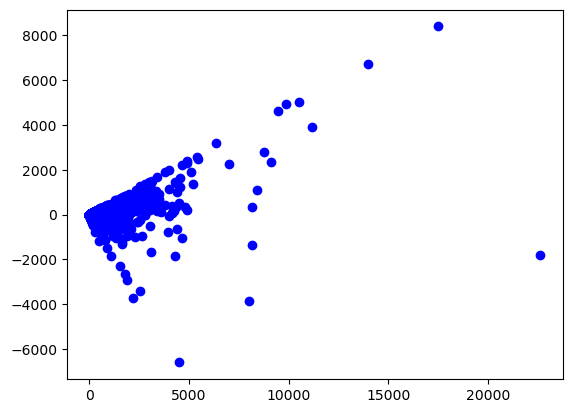

In [92]:
plt.scatter(df['Sales'],df['Profit'],color='blue')

Pie plot of negative profit per category

<Axes: ylabel='Profit'>

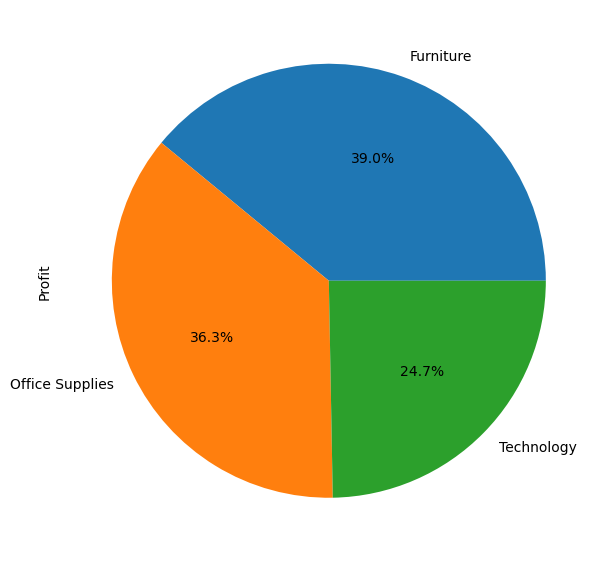

In [94]:
loss_per_category=pd.DataFrame(negative_profit.groupby('Category')['Profit'].agg('sum'))
plt.figure(figsize=(7,8))
np.absolute(loss_per_category['Profit']).plot.pie(autopct="%1.1f%%")

Barh plot of negative profit per sub-category

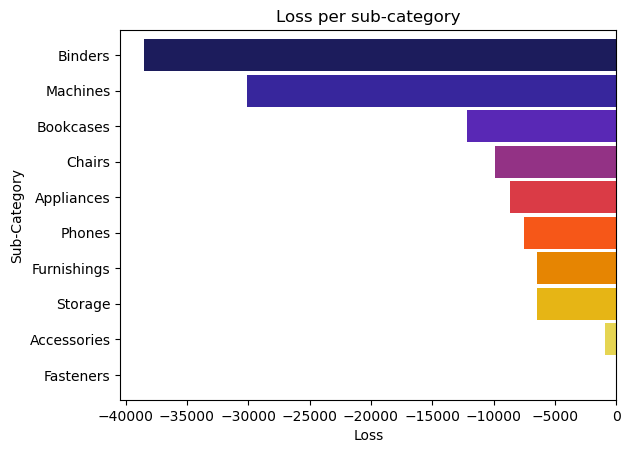

In [100]:
loss_per_subcategory=negative_profit.groupby('Sub-Category')['Profit'].agg('sum')
pd.DataFrame(loss_per_subcategory)
loss_per_subcategory.head(10).sort_values(ascending=False).plot.barh(width=0.9,color=sns.color_palette('CMRmap_r',10))
plt.title("Loss per sub-category")
plt.xlabel("Loss")
plt.show()

Bar plot between Sub-category Vs category

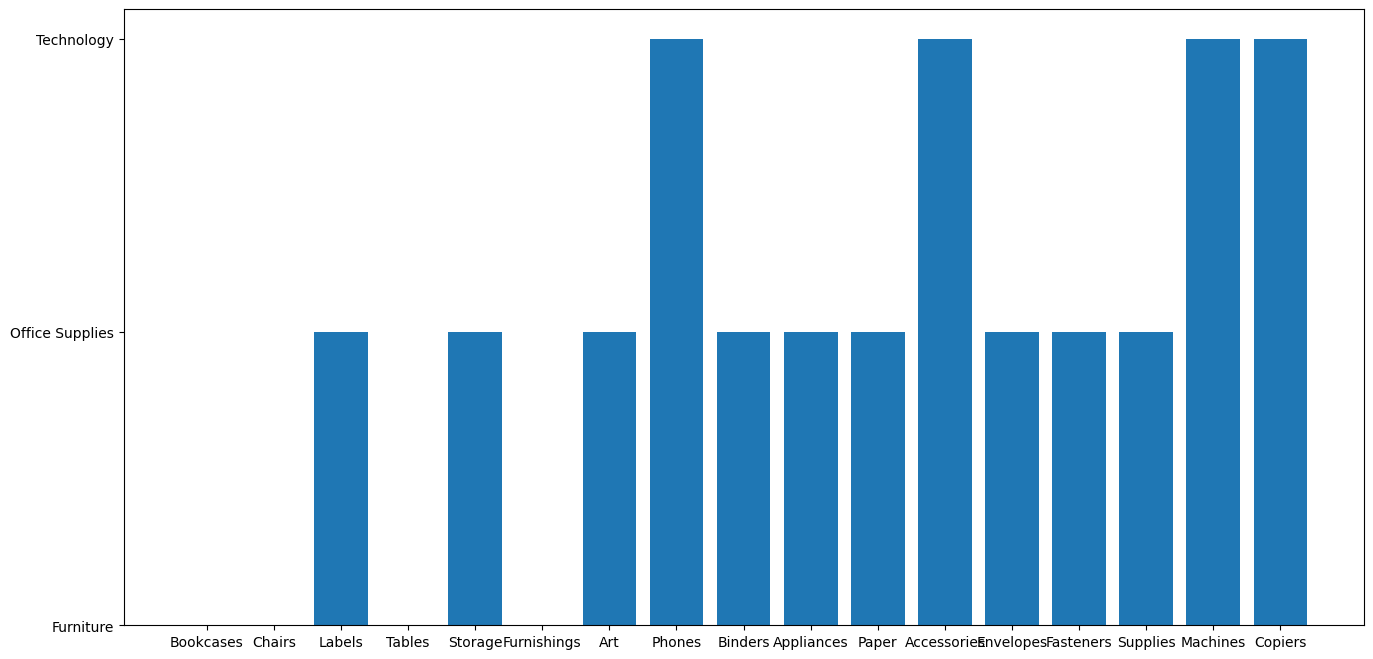

In [101]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df)
plt.show()

Pie plot of Discount,Profit and Sales based on Category

In [102]:
df_category=df.groupby(['Category'])[['Sales','Discount','Profit']].mean()
df_category

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


array([<Axes: ylabel='Sales'>, <Axes: ylabel='Discount'>,
       <Axes: ylabel='Profit'>], dtype=object)

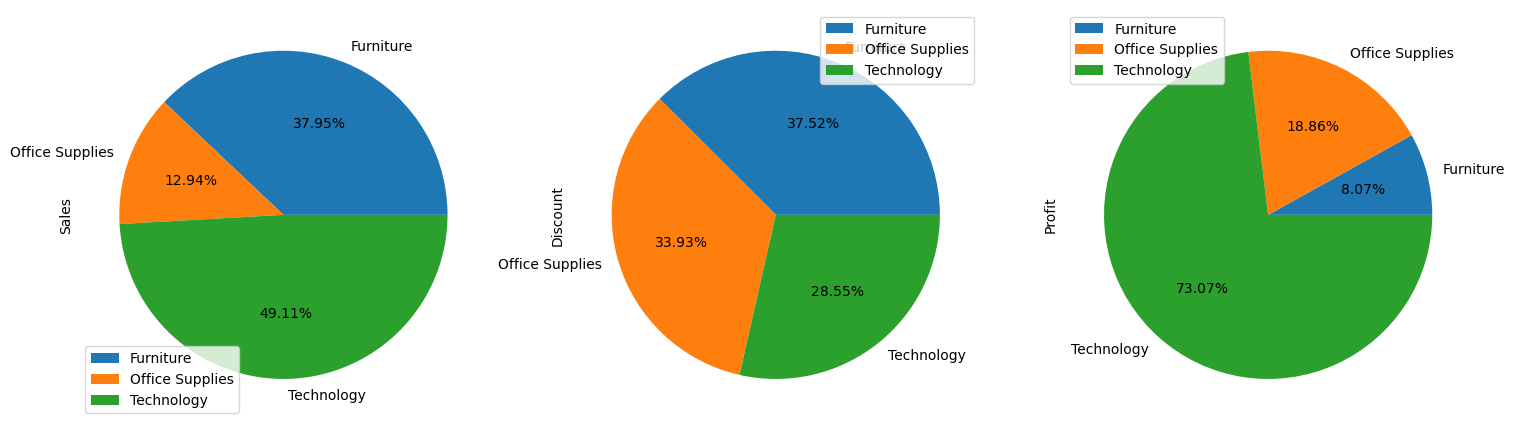

In [103]:
df_category.plot.pie(subplots=True, figsize=(18, 16), autopct='%1.2f%%', labels=list(df_category.index))

Pie plot of sales,Discount and profit based on ship mode

In [104]:
df_ShipMode=df.groupby(['Ship Mode'])[['Sales','Discount','Profit']].mean()
df_ShipMode

,Sales,Discount,Profit
Ship Mode,,,
First Class,228.497024,0.164610,31.839948
Same Day,236.396179,0.152394,29.266591
Second Class,236.089239,0.138895,29.535545
Standard Class,227.583067,0.160023,27.494770


array([<Axes: ylabel='Sales'>, <Axes: ylabel='Discount'>,
       <Axes: ylabel='Profit'>], dtype=object)

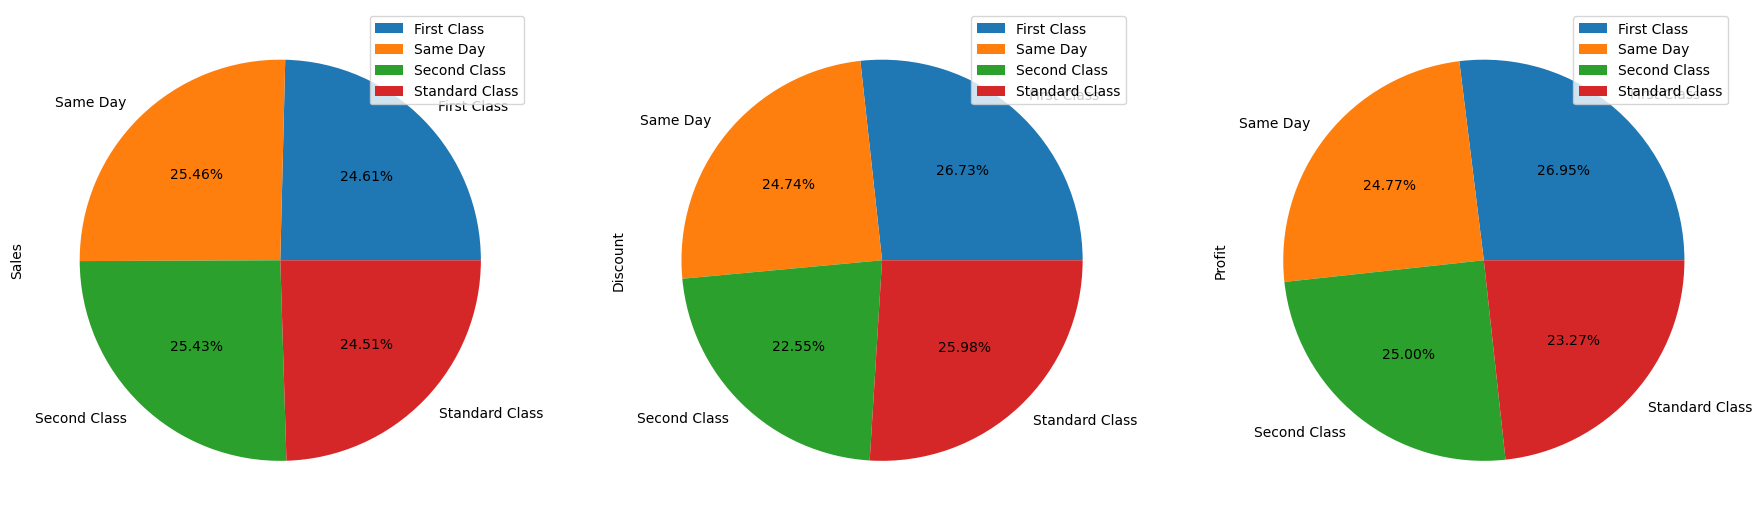

In [105]:
df_ShipMode.plot.pie(subplots=True, figsize=(22, 20), autopct='%1.2f%%', labels=list(df_ShipMode.index))

Pie plot of sales,discount and profit based on region

In [106]:
df_Region=df.groupby(['Region'])[['Sales','Discount','Profit']].mean()
df_Region

,Sales,Discount,Profit
Region,,,
Central,215.772661,0.240353,17.092709
East,238.336110,0.145365,32.135808
South,241.803645,0.147253,28.857673
West,226.493233,0.109335,33.849032


array([<Axes: ylabel='Sales'>, <Axes: ylabel='Discount'>,
       <Axes: ylabel='Profit'>], dtype=object)

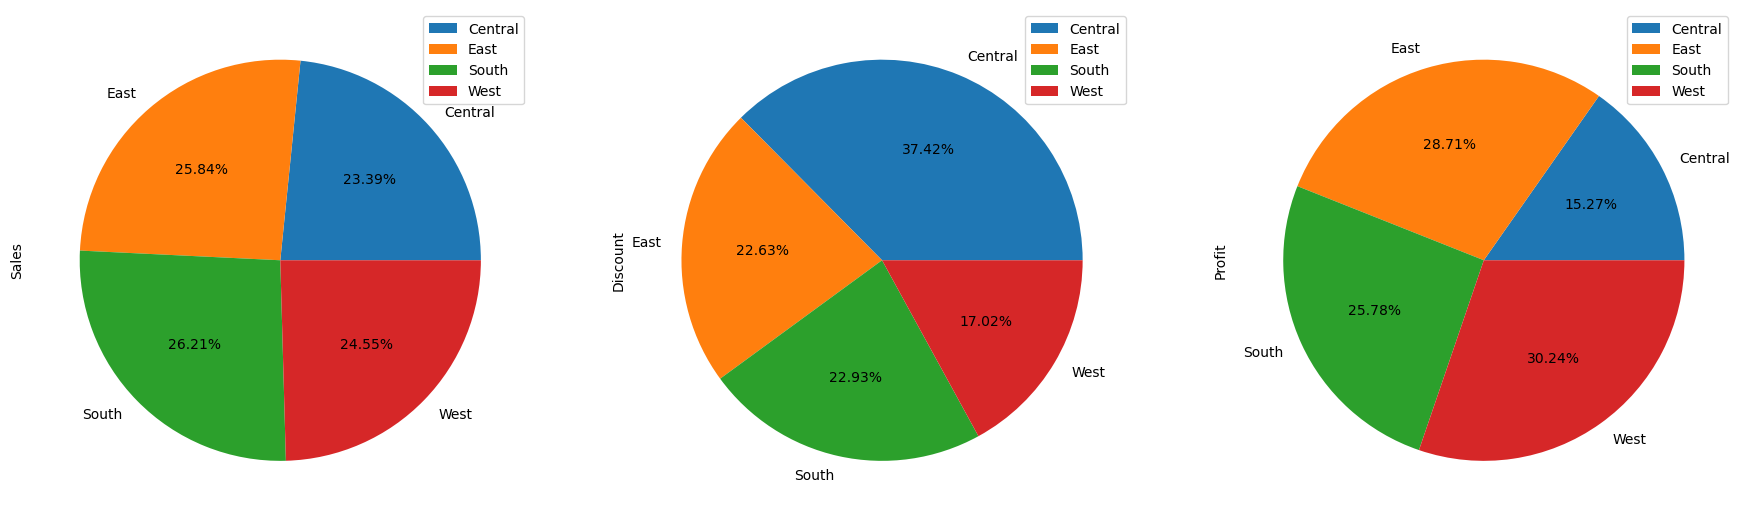

In [107]:
df_Region.plot.pie(subplots=True, figsize=(22, 20), autopct='%1.2f%%', labels=list(df_Region.index))

Pie plot of sales,discount and profit based on segment

In [108]:
df_Segment=df.groupby(['Segment'])[['Sales','Discount','Profit']].mean()
df_Segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


array([<Axes: ylabel='Sales'>, <Axes: ylabel='Discount'>,
       <Axes: ylabel='Profit'>], dtype=object)

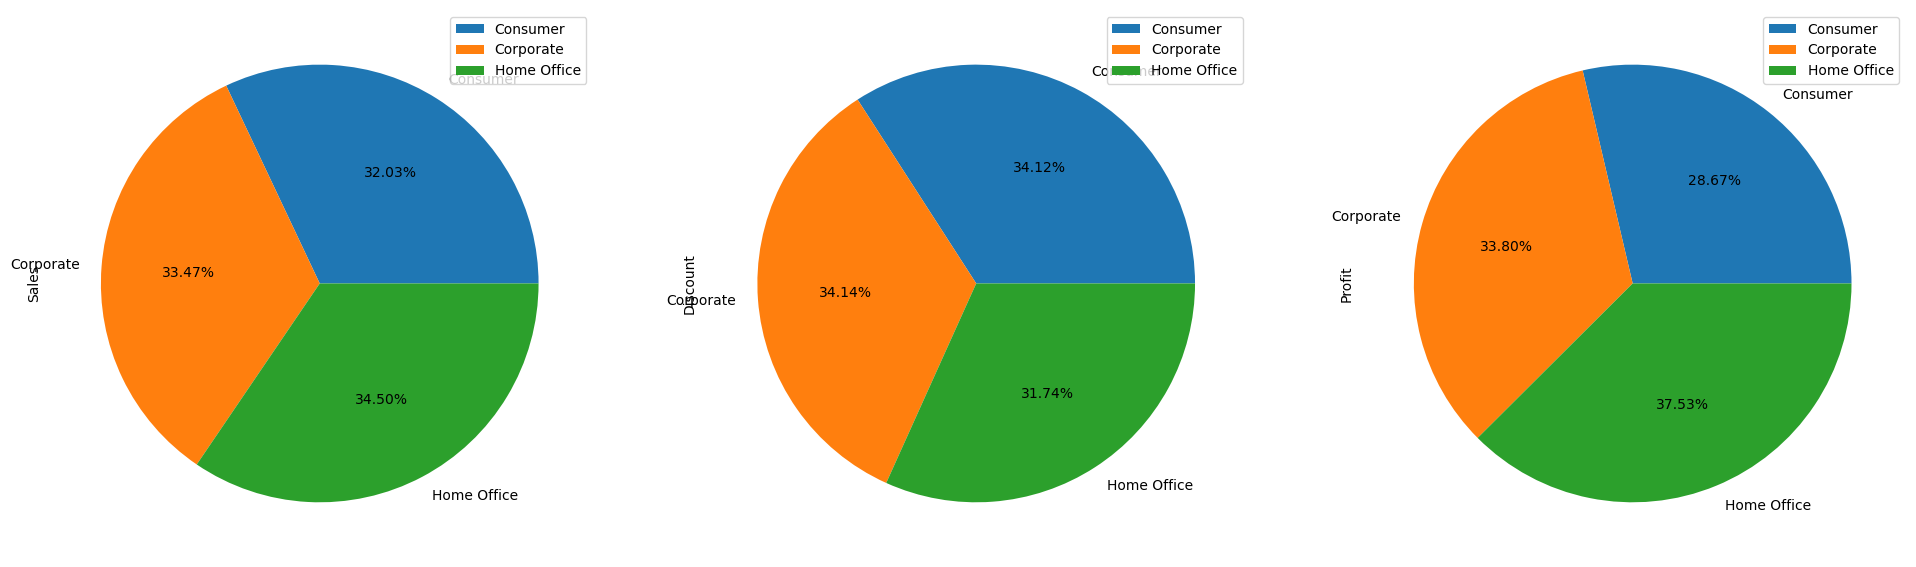

In [109]:
df_Segment.plot.pie(subplots=True, figsize=(24, 22), autopct='%1.2f%%', labels=list(df_Segment.index))

Pie plot of Sub-Category

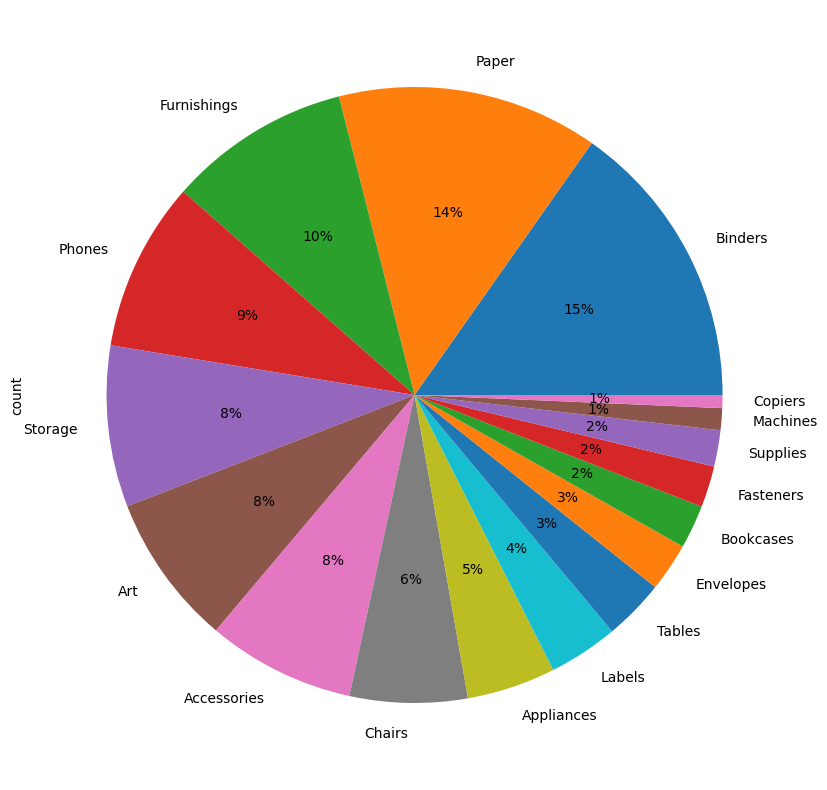

In [110]:
plt.figure(figsize=(12,10))
df["Sub-Category"].value_counts().plot.pie(autopct="%1.0f%%")
plt.show()

Bar plot Of Sales Vs profit based on Sub-category

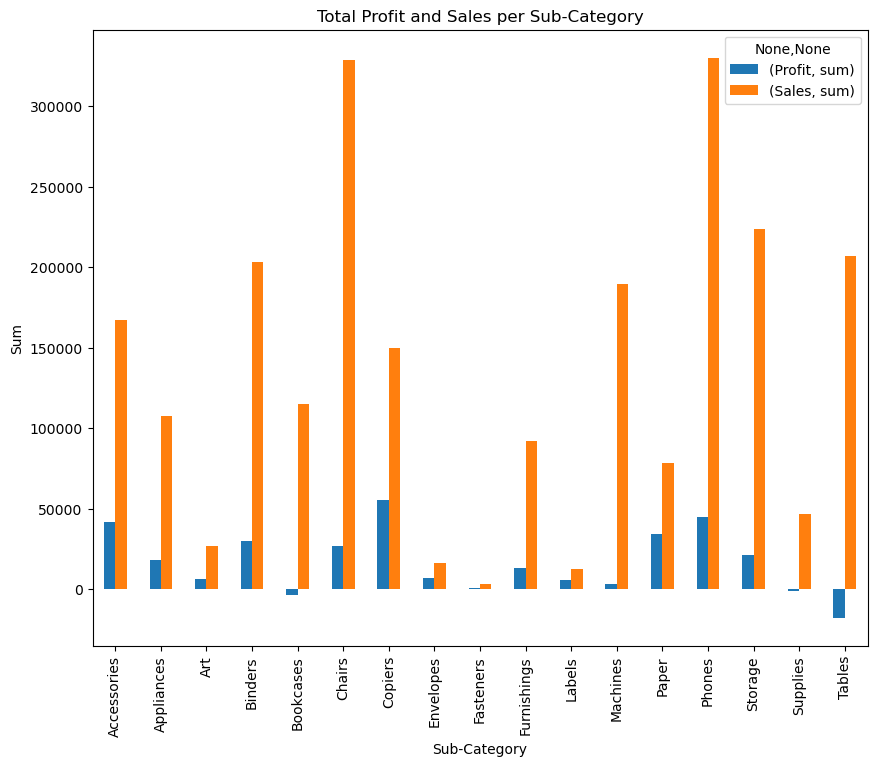

In [114]:
agg_df = df.groupby('Sub-Category')[['Profit', 'Sales']].agg(['sum'])
agg_df.plot(kind='bar', figsize=(10, 8))
plt.title('Total Profit and Sales per Sub-Category')
plt.ylabel('Sum')
plt.xlabel('Sub-Category')
plt.show()

Count plot of states

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

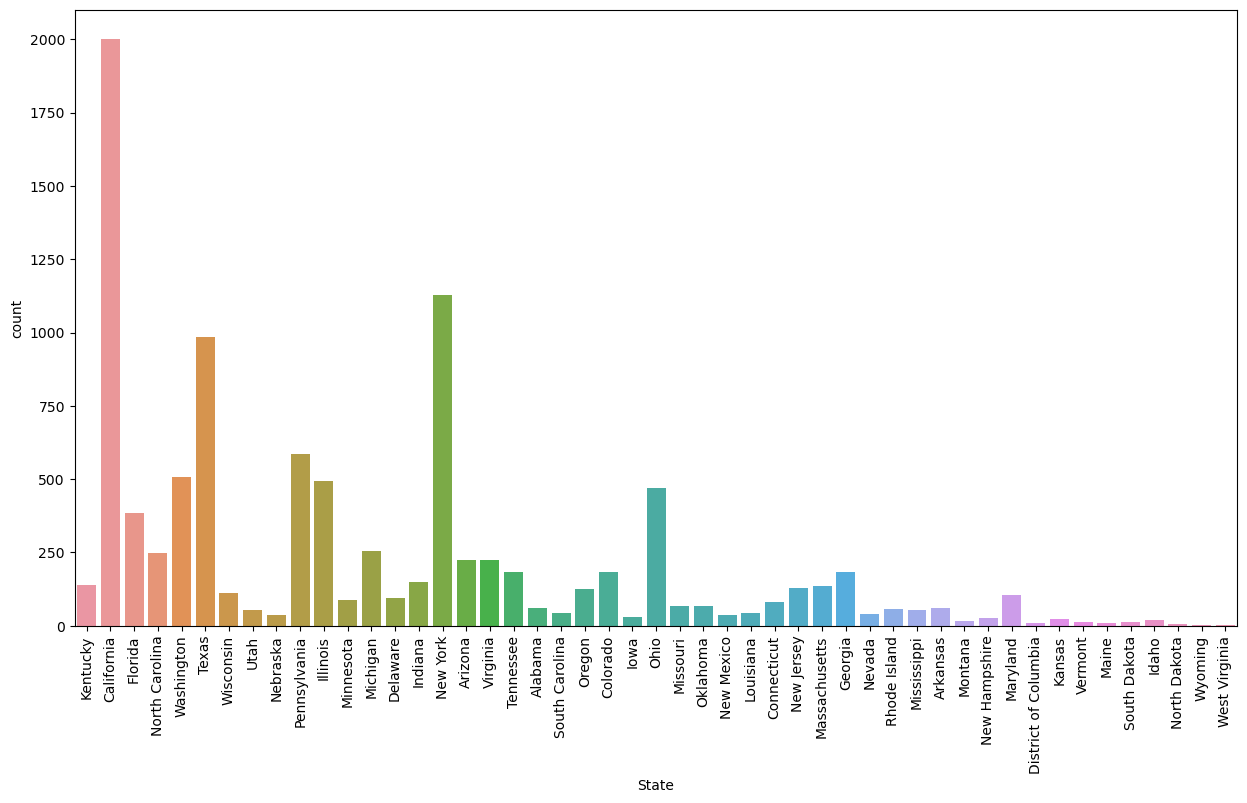

In [115]:
print(df['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.show()

Bar plot of Sales and Profit Based on Region

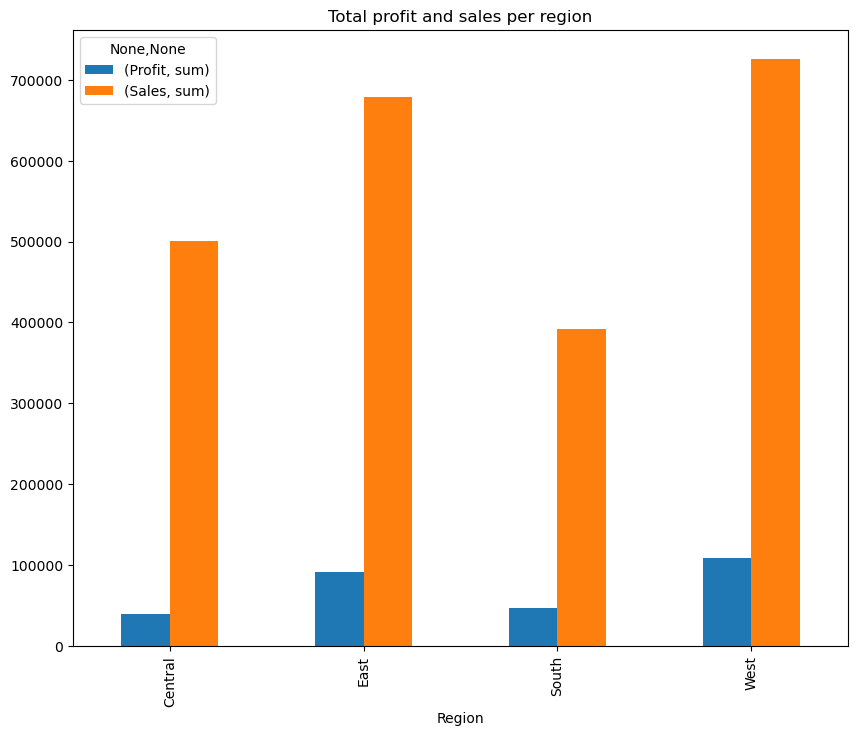

In [117]:
df.groupby('Region')[['Profit','Sales']].agg(['sum']).plot.bar()
plt.title('Total profit and sales per region')
plt.rcParams['figure.figsize']=[10,8]
plt.show()

Count plot of Sub-Categories

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64


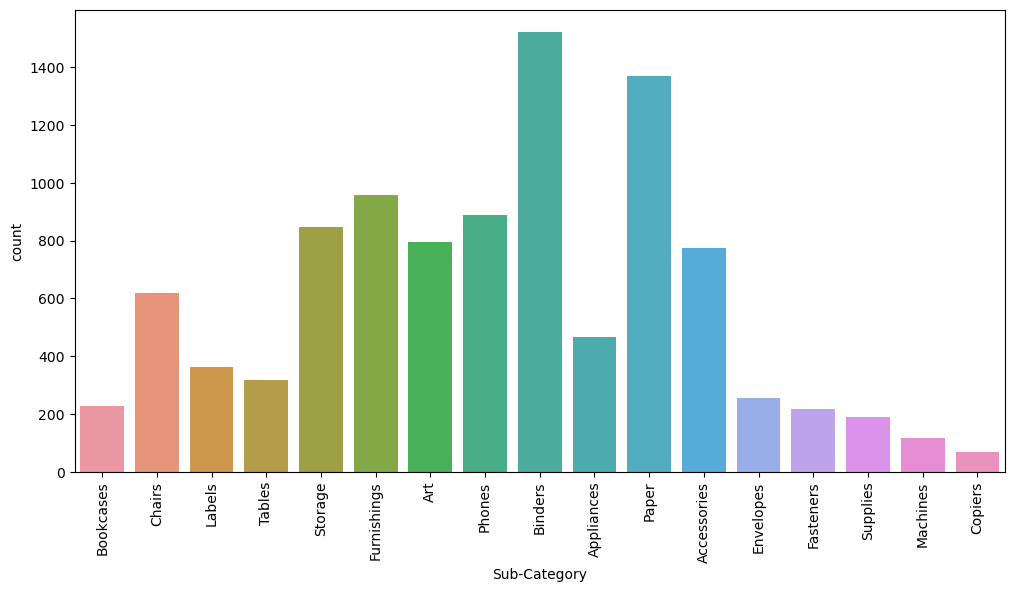

In [118]:
print(df['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

Heatmap of correaltion among the columns

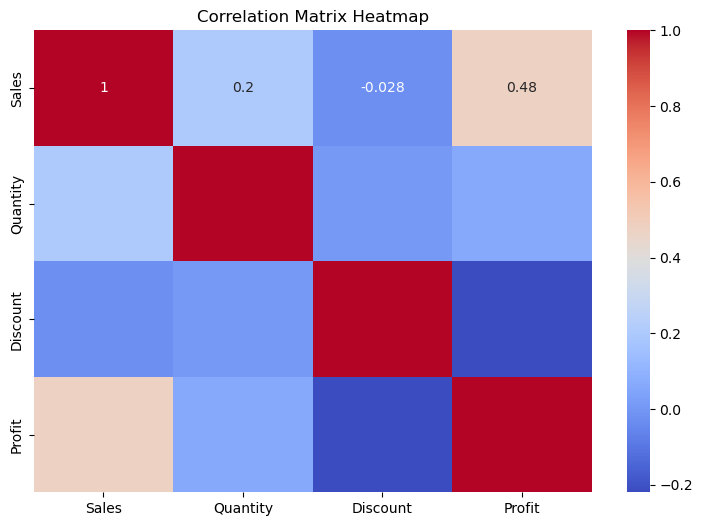

In [120]:
fig, axes = plt.subplots(1, 1, figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes)
plt.title('Correlation Matrix Heatmap')
plt.show()

Heatmap of covariance among the set of variables

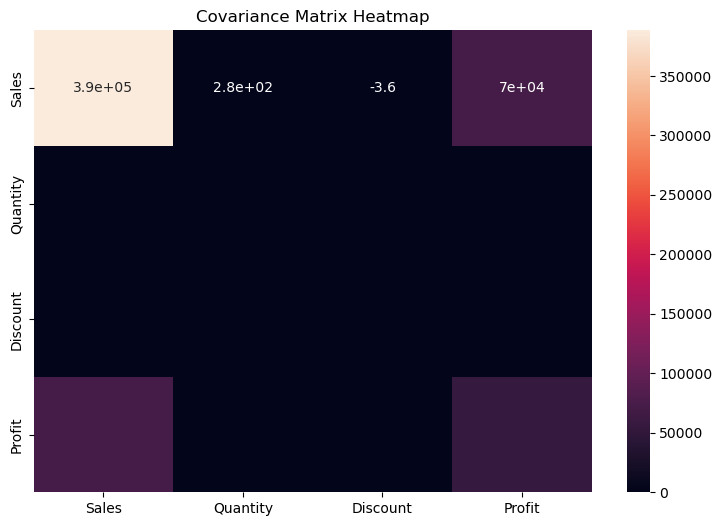

In [128]:
fig, axes = plt.subplots(1, 1, figsize=(9, 6))
sns.heatmap(df_numeric.cov(), annot=True, ax=axes)
plt.title('Covariance Matrix Heatmap')
plt.show()

Count plot of segment

<Axes: xlabel='Segment', ylabel='count'>

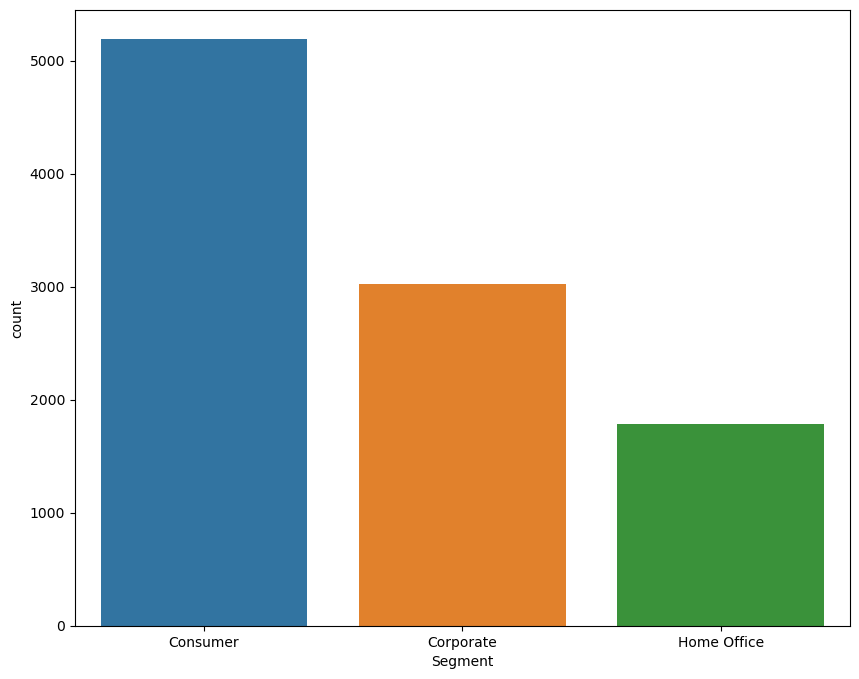

In [129]:
sns.countplot(x=df['Segment'])

Count plot of region

<Axes: xlabel='Region', ylabel='count'>

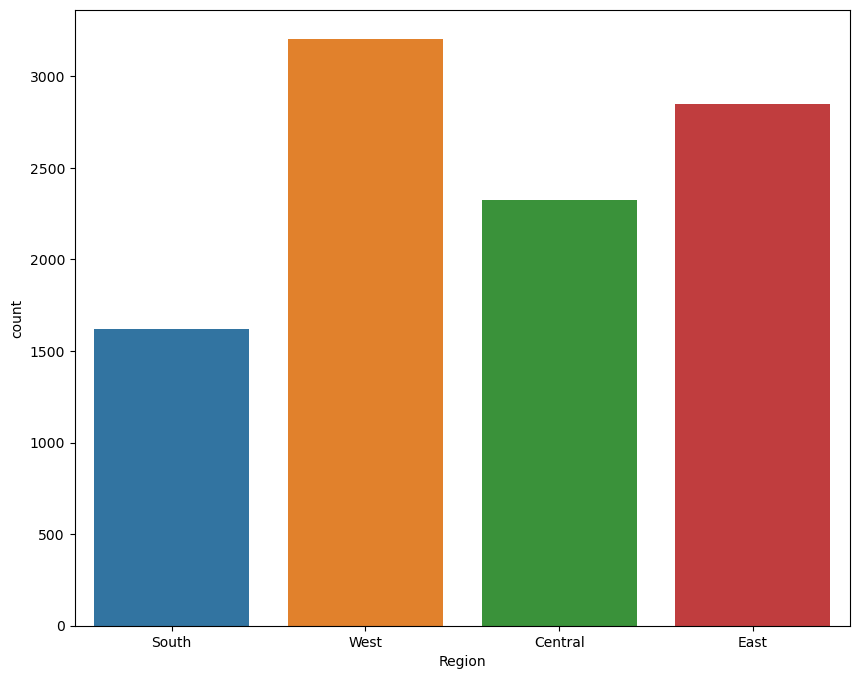

In [130]:
sns.countplot(x=df['Region'])

Bar plot of Sub-category vs profit

<Axes: xlabel='Sub-Category', ylabel='Profit'>

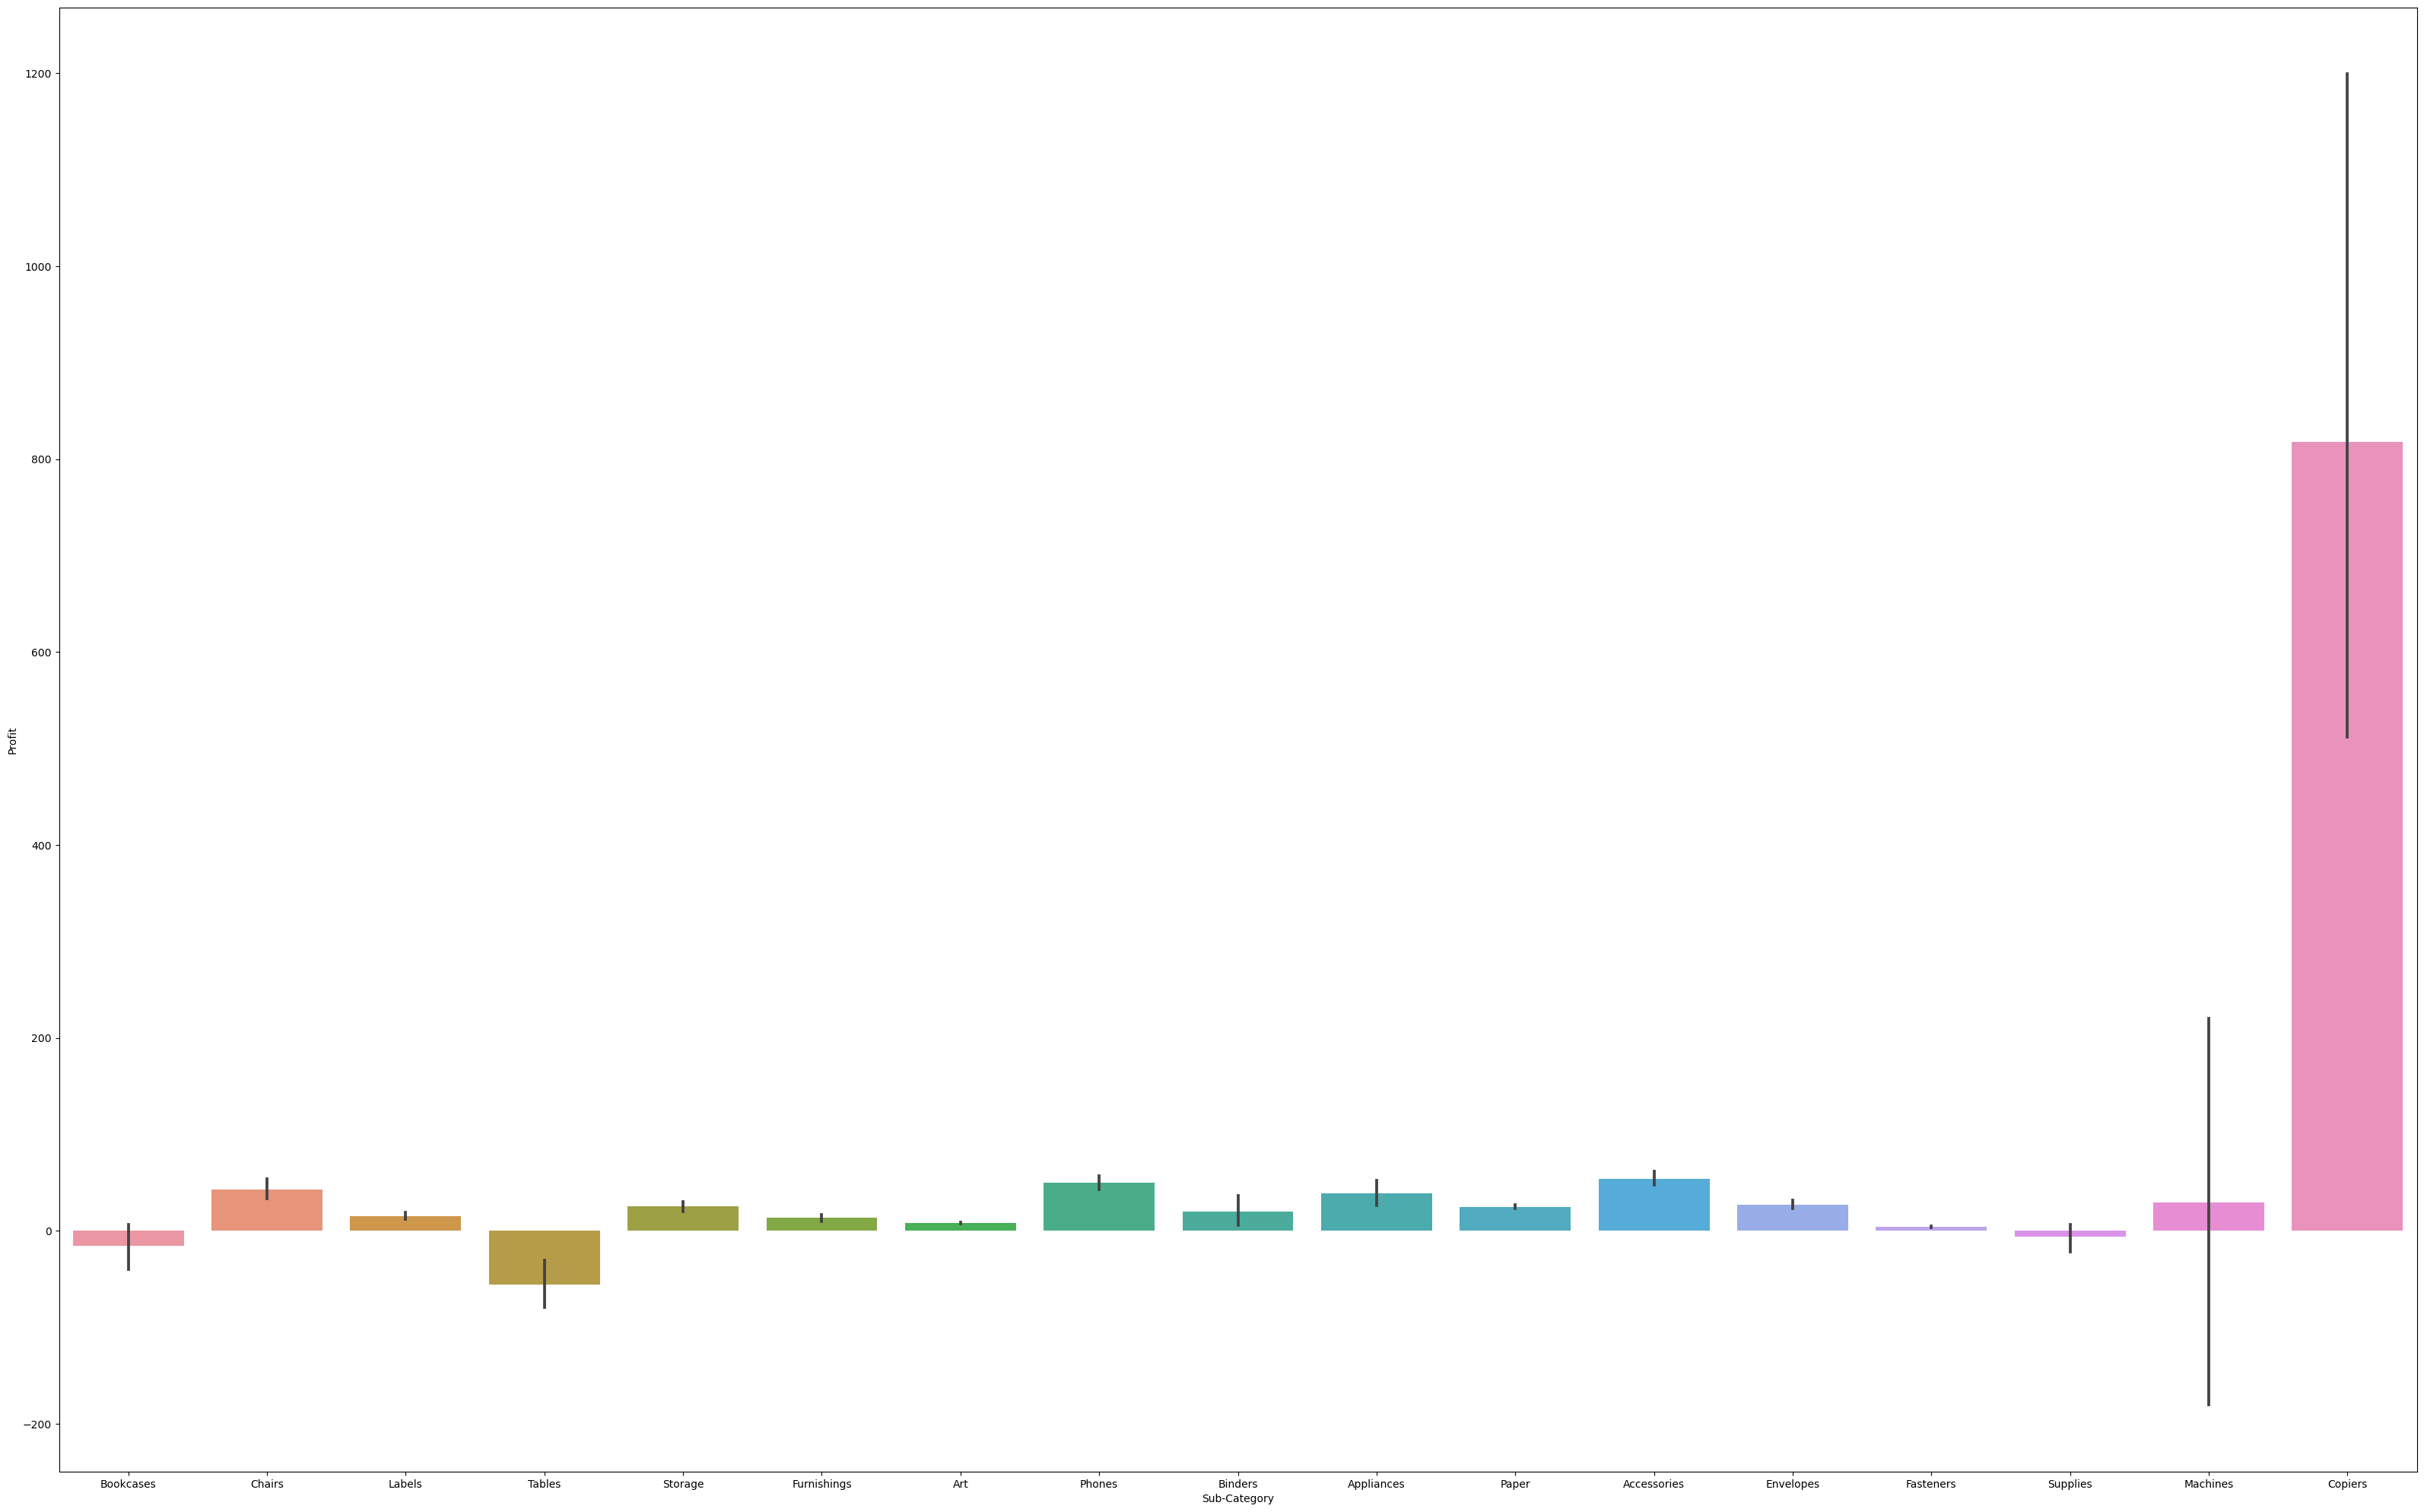

In [131]:
plt.figure(figsize=(40,25))
sns.barplot(x=df['Sub-Category'],y=df['Profit'])

Line plot of Discount Vs Profit

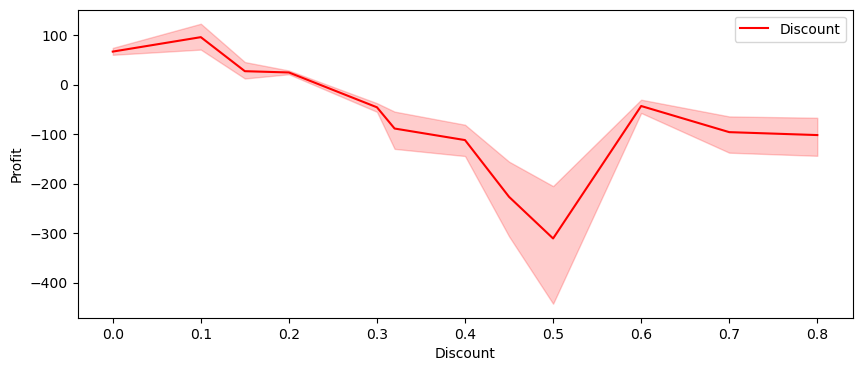

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.lineplot(x='Discount', y='Profit', data=df, color='r', label='Discount')
plt.legend()
#plt.show()

Histogram of data

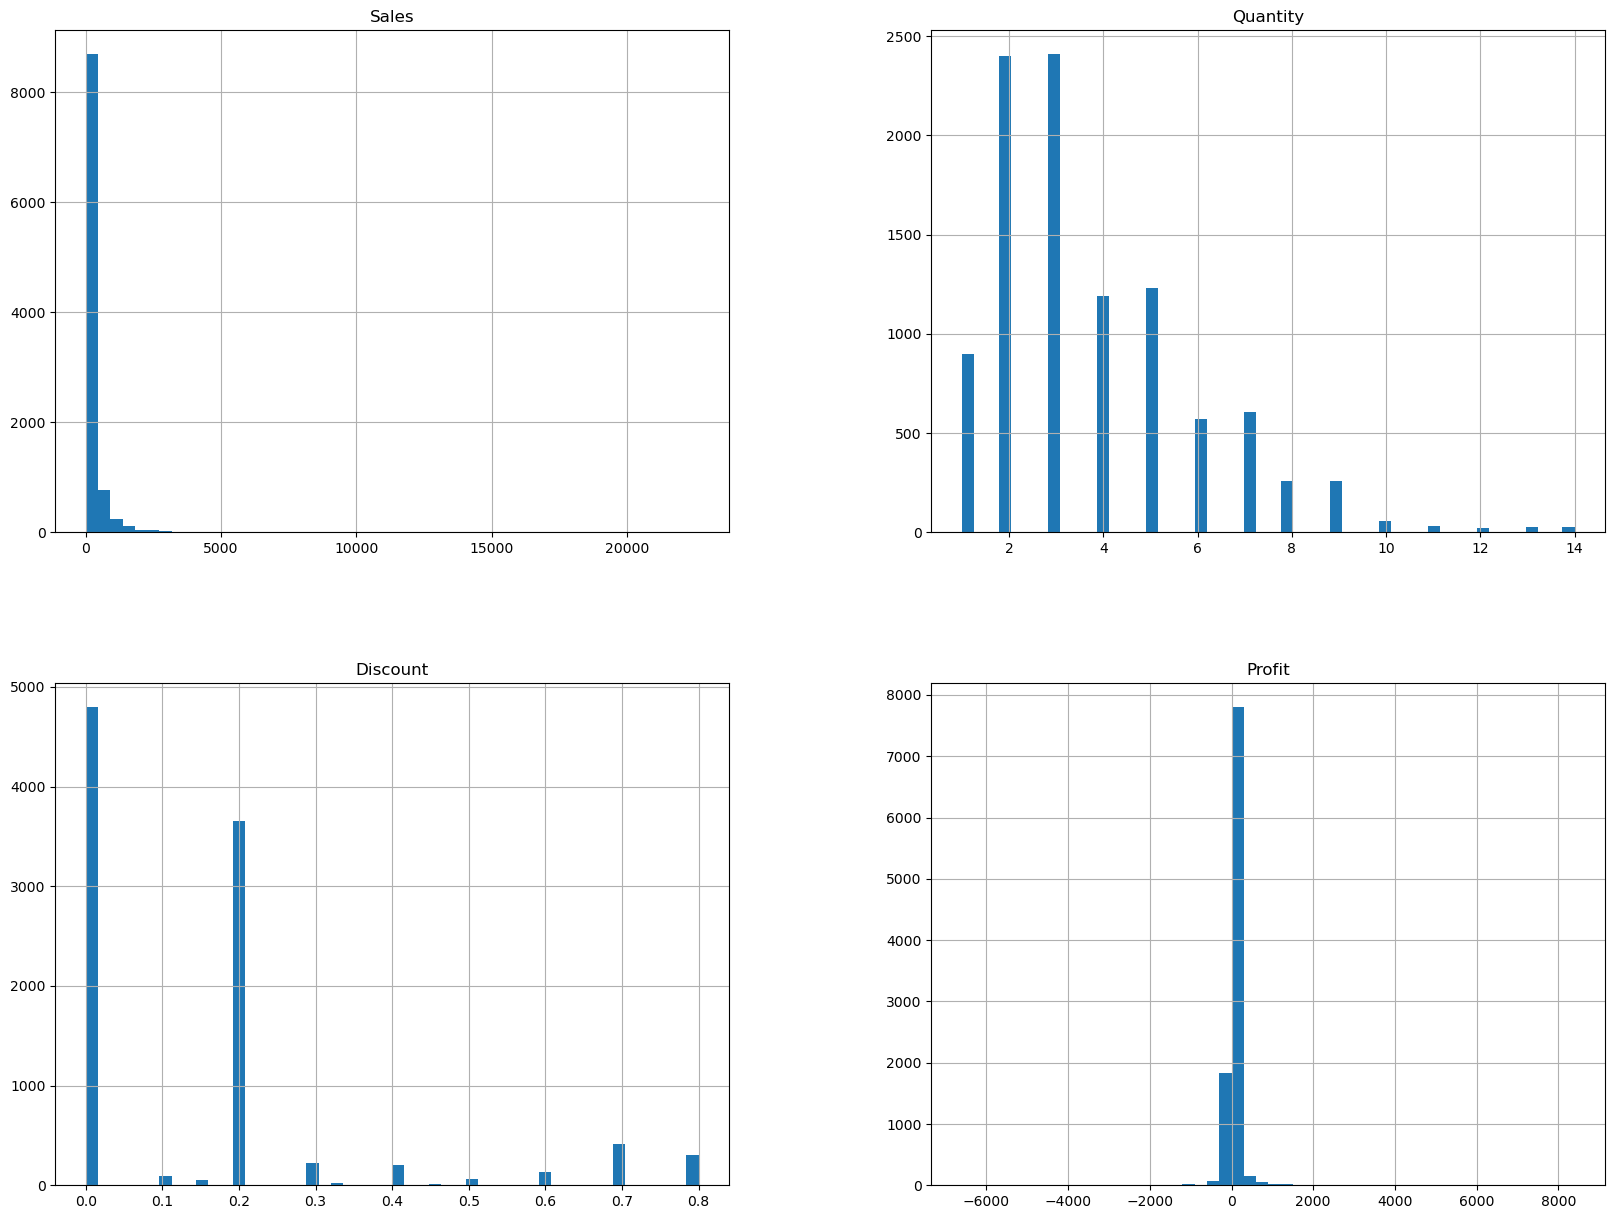

In [133]:
df.hist(bins=50,figsize=(20,15))
plt.show()

pairplot of sub category

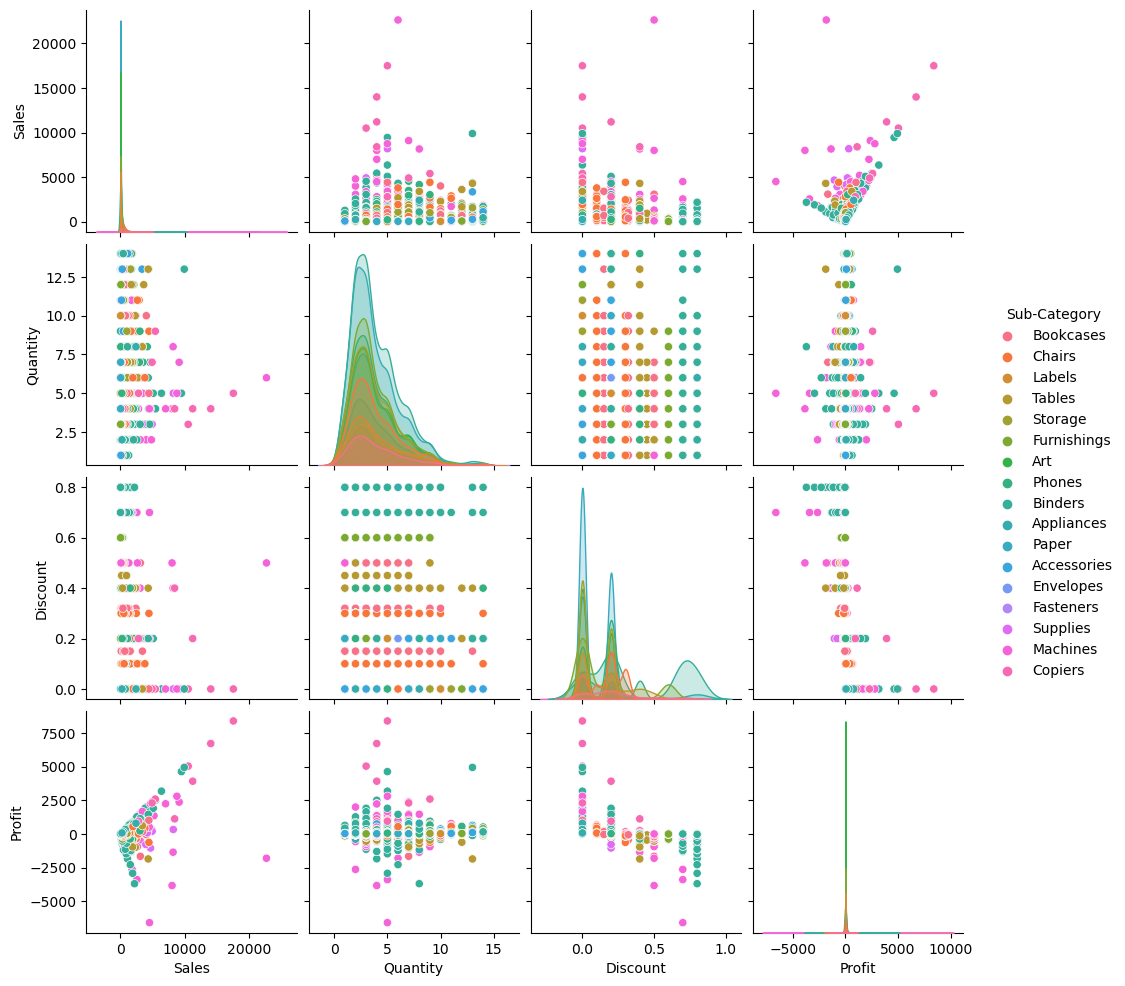

In [136]:
figsize=(15,10)
sns.pairplot(df,hue='Sub-Category')

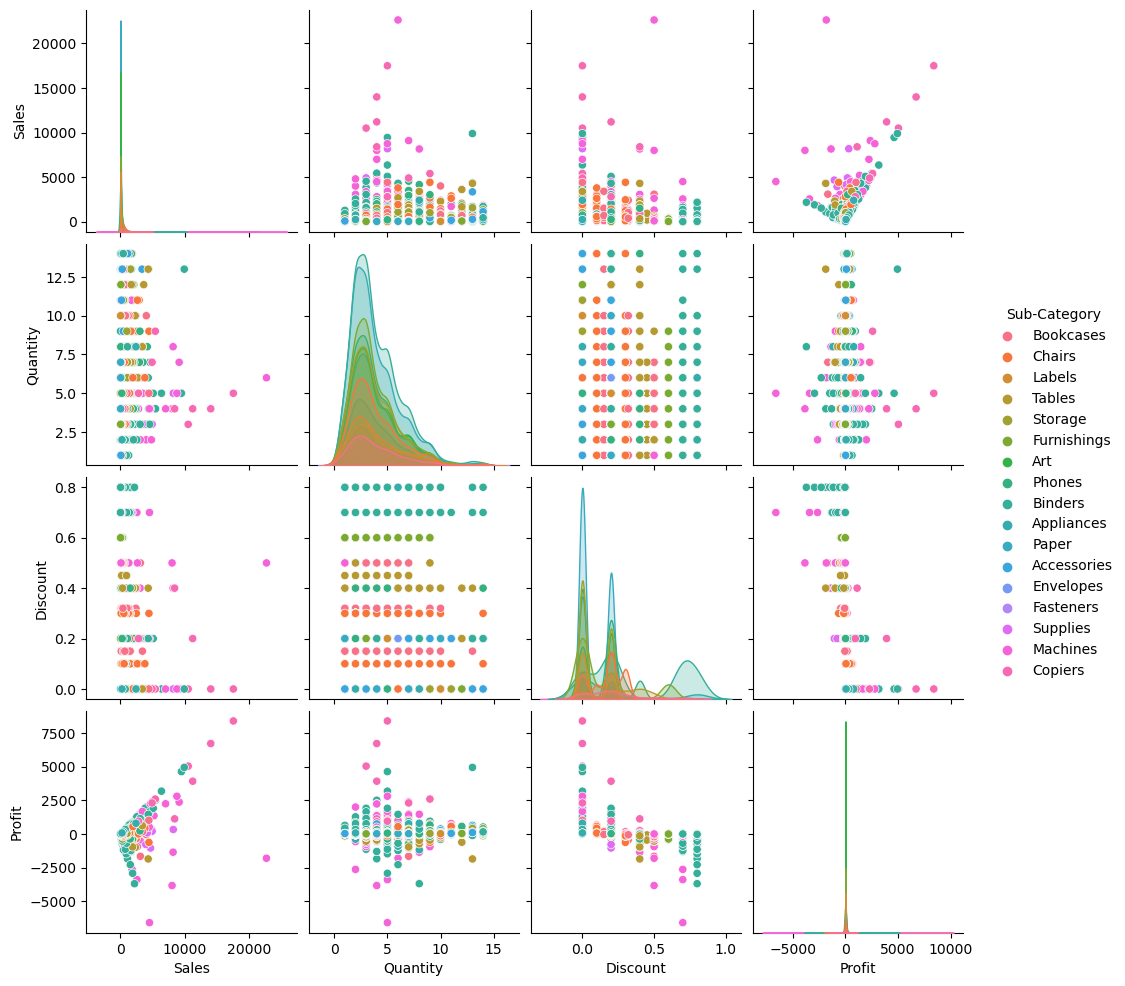

In [136]:
figsize=(15,10)
sns.pairplot(df,hue='Sub-Category')

In [139]:
grouped=pd.DataFrame(df.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])[['Quantity','Discount','Sales','Profit']].sum().reset_index())
grouped

,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


Statistical summary of data

In [140]:
df.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


pair plot of data

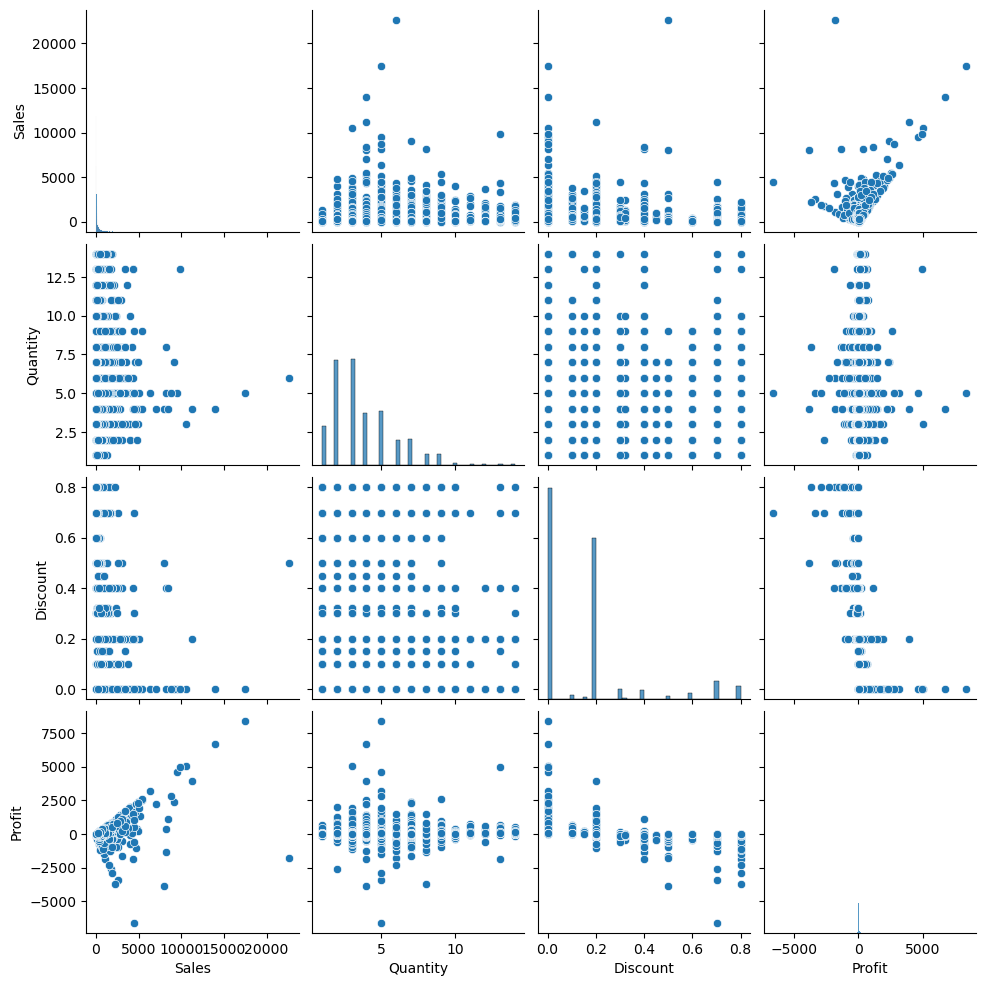

In [141]:
sns.pairplot(df)

Box plot of sales

<Axes: >

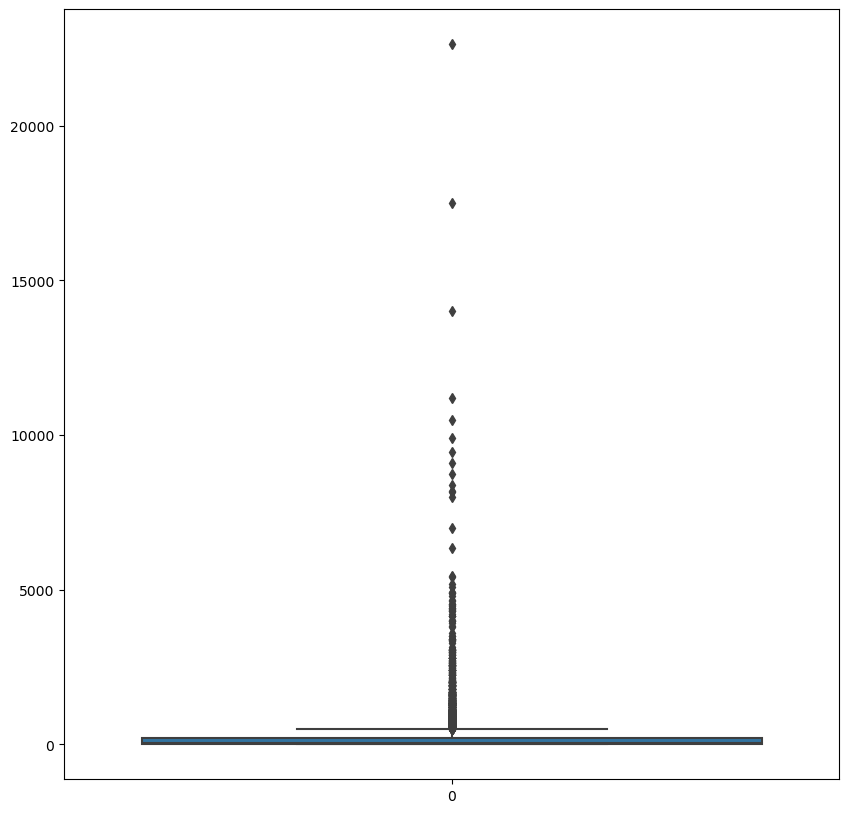

In [142]:
fig,axes=plt.subplots(figsize=(10,10))
sns.boxplot(df['Sales'])

Box plot of discount

<Axes: >

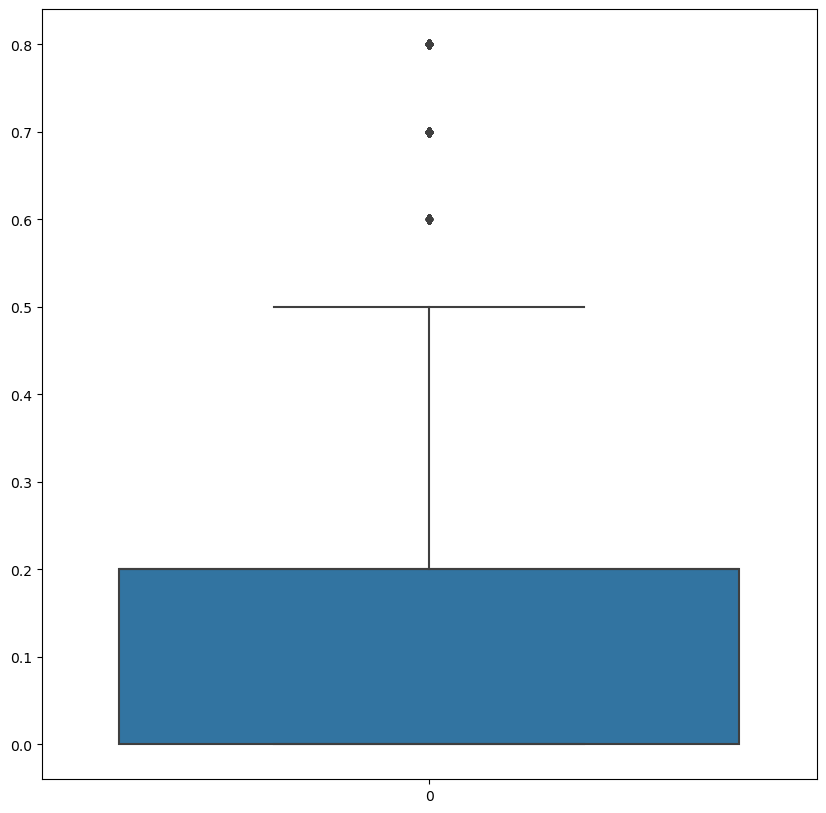

In [143]:
fig,axes=plt.subplots(figsize=(10,10))
sns.boxplot(df['Discount'])

Box plot of Profit

<Axes: >

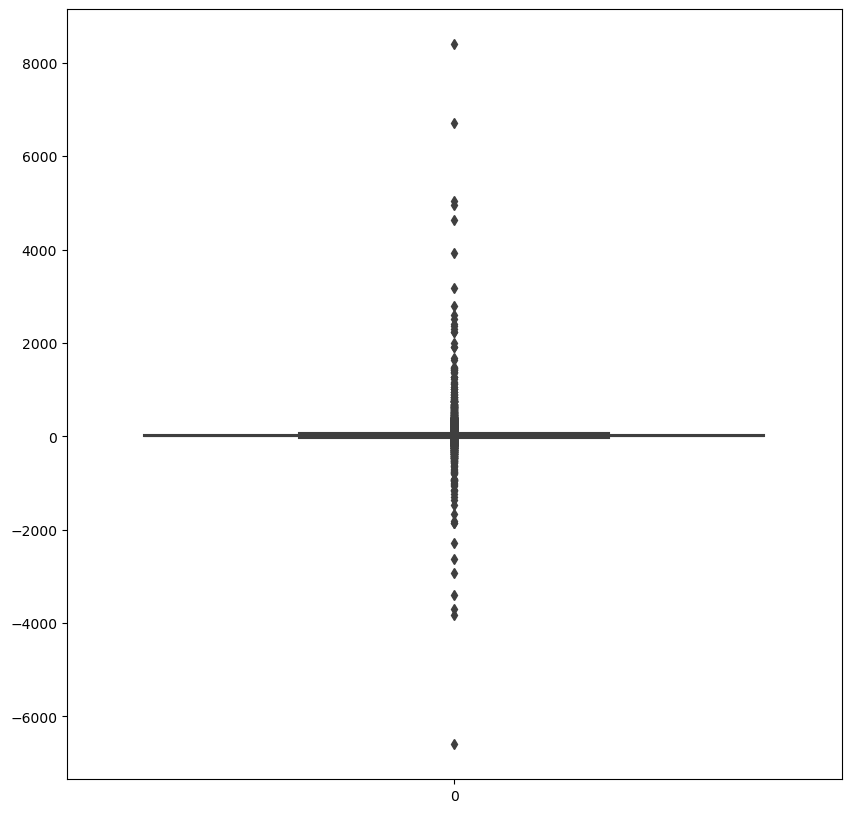

In [144]:
fig,axes=plt.subplots(figsize=(10,10))
sns.boxplot(df['Profit'])

In [145]:
Q1=df.quantile(q=0.25,axis=0,numeric_only=True,interpolation='linear')
Q3=df.quantile(q=0.75,axis=0,numeric_only=True,interpolation='linear')

In [146]:
IQR=Q3-Q1
print(IQR)

Sales       192.66000
Quantity      3.00000
Discount      0.20000
Profit       27.63525
dtype: float64


<Axes: xlabel='Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit'>

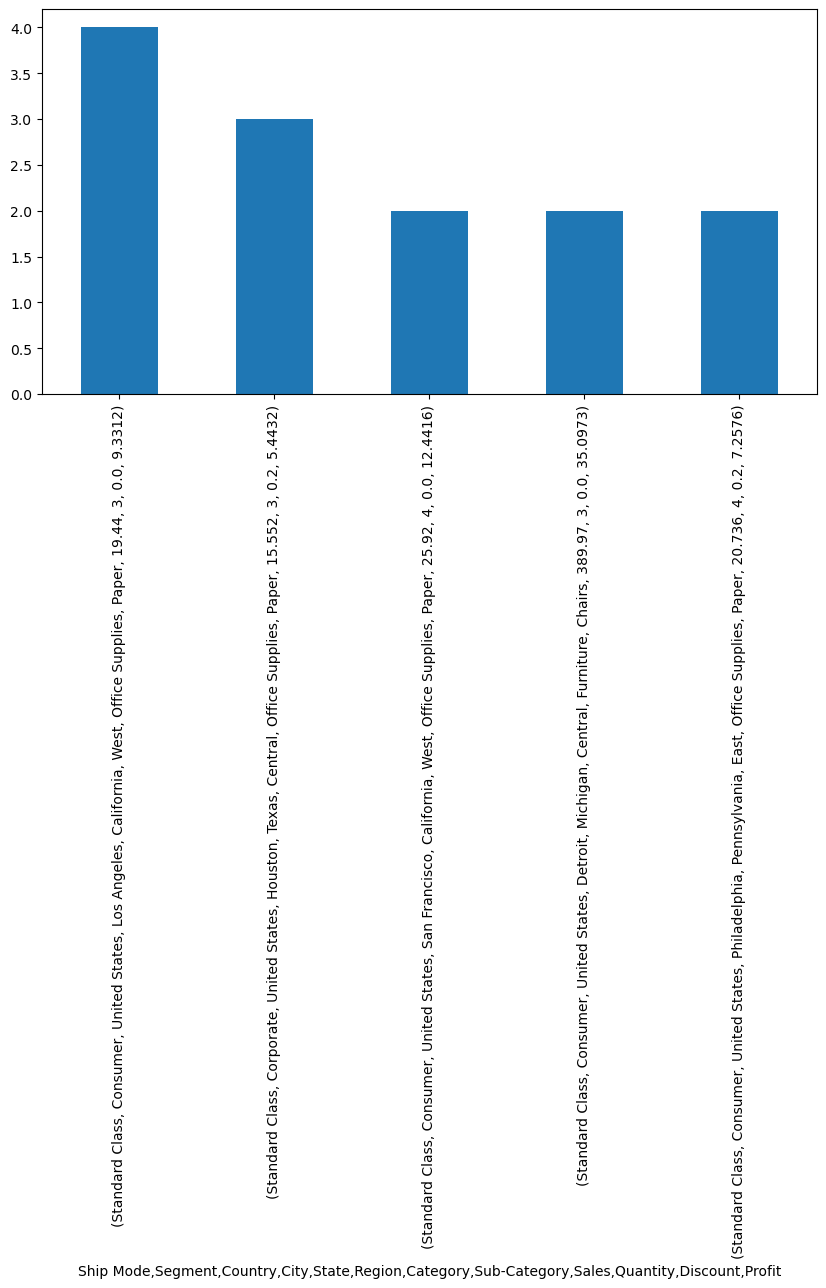

In [147]:
df.value_counts().nlargest().plot(kind='bar',figsize=(10,5))

Plots of value counts

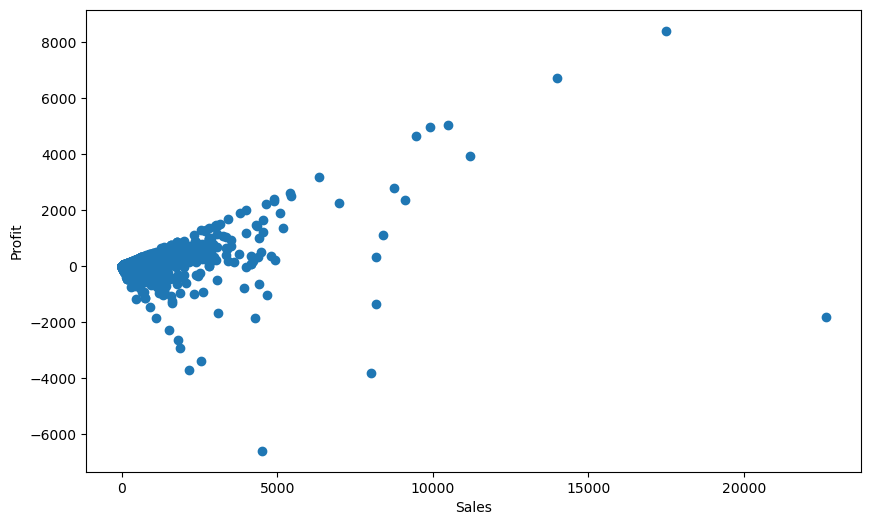

In [148]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(df["Sales"],df["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

Sales statistical data

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


<Axes: xlabel='Sales', ylabel='Density'>

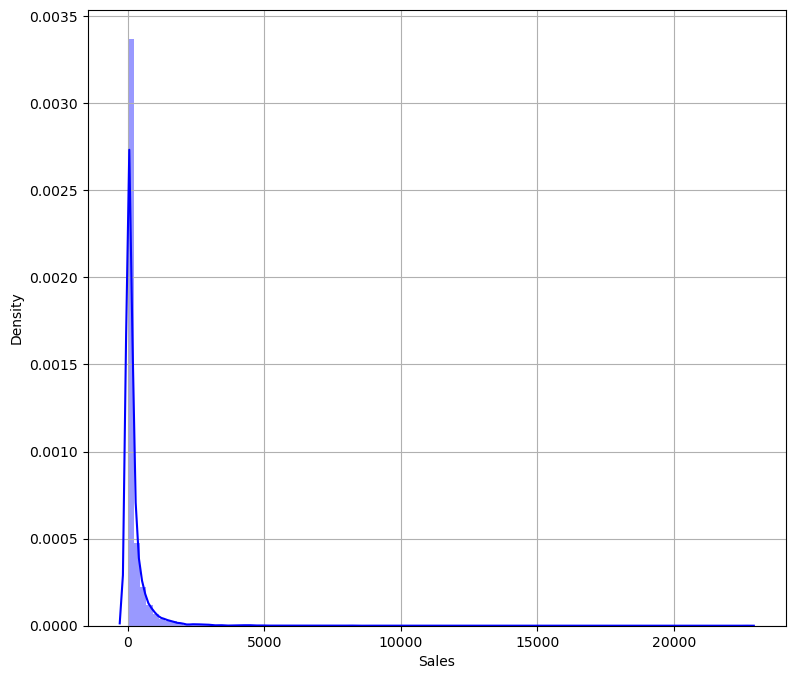

In [149]:
print(df['Sales'].describe())
plt.figure(figsize=(9,8))
plt.grid()
sns.distplot(df['Sales'],color='b',bins=100,hist_kws={'alpha':0.4})

Box plot of sales,Discount,Quantity and Profit

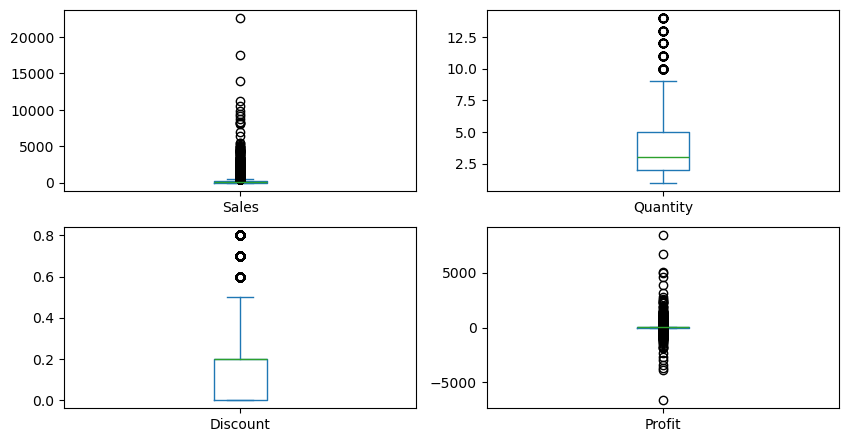

In [150]:
df.plot(kind='box',subplots=True,layout=(3,2),sharex=False,sharey=False)
plt.rcParams['figure.figsize']=[14,12]
plt.show()

OBSERVATIONS AND INSIGHTS:-

1.Regional Profit Analysis:

The South and Central regions exhibit lower profit margins.
In contrast, the East and West regions generate higher profits compared to the South and Central regions.

2.Product Performance:

The highest profit is achieved from the sale of copiers.
Phones and chairs exhibit high sales volumes, significantly outpacing other product categories.

3.Sales and Profitability Issues:

Tables and bookcases, despite moderate sales volumes, are incurring losses, indicating a potential issue with these product lines.
The store offers a diverse range of office supplies, with binders and papers being particularly well-represented.

4.Correlation Analysis:

There is a negative correlation between profit and discount, suggesting that higher discounts are associated with lower profit margins.

5.Product-Specific Profitability:

The total profit from the sale of tables is negative, indicating an overall loss in this category.
Copier sales are notably more profitable compared to other product categories.
Sales of supplies yield minimal to no profit.

6.Segment Profitability:

The technology segment is identified as the most profitable segment in the store's portfolio.